# Análisis de extracción de oro

La empresa Zyfra desarrolla soluciones de eficiencia para la industria pesada y necesita un prototipo de un modelo de machine learning. 

El modelo debe predecir la cantidad de oro extraído del mineral de oro para optimizar la producción y eliminar los parámetros no rentables. 

Se tienen los datos de extracción y purificación. 

## Inicialización y preprocesamiento de datos

### Importar librerias y cargar datos

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score  
from statistics import mean

In [2]:
# Cargar archivos de datos
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

### Vista previa de los datasets

**DataFrame de entrenamiento**

In [3]:
#vista previa del df de entrenamiento
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# información general del df de entrenamiento
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
#descripción del df de entrenamiento
gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


**DataFrame de prueba**

In [6]:
#vista previa del df de prueba
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
# información general del df de prueba
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
#descripción del df de prueba
gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


**DataFrame fuente**

In [9]:
#vista previa del df fuente
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
# información general del df fuente
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [11]:
#descripción del df fuente
gold_recovery_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el de prueba. El conjunto de prueba tampoco contiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

### Descripción de los datos
**Proceso tecnológico**
- Rougher feed — materia prima
- Rougher additions (o adiciones de reactivos) - reactivos de flotación: xantato, sulfato, depresante
- Xantato — promotor o activador de la flotación
- Sulfato — sulfuro de sodio para este proceso en particular
- Depresante — silicato de sodio
- Rougher process — flotación
- Rougher tails — residuos del producto
- Float banks — instalación de flotación
- Cleaner process — purificación
- Rougher Au — concentrado de oro rougher
- Final Au — concentrado de oro final

**Parámetros de las etapas**
- air amount — volumen de aire
- fluid levels
- feed size — tamaño de las partículas de la alimentación
- feed rate

### Denominación de las características / columnas

Se tiene la columna `date` que representa la fecha y hora de adquisición de los datos.

El nombre del resto de las columnas sigue el siguiente formato: `[stage].[parameter_type].[parameter_name]`

Valores posibles para `[stage]`:
- rougher — flotación
- primary_cleaner — purificación primaria
- secondary_cleaner — purificación secundaria
- final — características finales

Valores posibles para `[parameter_type]`:
- input — parámetros de la materia prima
- output — parámetros del producto
- state — parámetros que caracterizan el estado actual de la etapa
- calculation — características de cálculo

### Recuperación del concentrado rougher

Se comprueba que el cálculo de la recuperación de la característica rougher (`rougher.output.recovery`) sea correcto mediante el conjunto de entrenamiento.

Se sabe que la recuperación se calcula mediante la siguiente fórmula:

    Recuperación =  ( C x (F-T) ) / ( F x (C-T) ) x 100%

donde:
- C — proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)
    -  `rougher.output.concentrate_au`
    
- F — la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)
    - `rougher.input.feed_au`
    
- T — la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)
    - `rougher.output.tail_au`

In [12]:
#df de entrenamiento sin valores ausentes
gold_recovery_train_drop = gold_recovery_train.dropna()

In [15]:
#Función para calcular la recuperación
def recuperacion (DF,C,F,T):
    DF['Rec'] = (( C * (F-T) ) / ( F * (C-T) ) )* 100
    return DF
    
#declarar variables para la recuperación del conjunto de entrenamiento
C = gold_recovery_train_drop.loc[:,'rougher.output.concentrate_au']
F = gold_recovery_train_drop.loc[:,'rougher.input.feed_au']
T = gold_recovery_train_drop.loc[:,'rougher.output.tail_au']

recuperacion(gold_recovery_train_drop,C,F,T).head()

/tmp/ipykernel_44/860779244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Rec'] = (( C * (F-T) ) / ( F * (C-T) ) )* 100


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,Rec
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [16]:
#calcular error absoluto medio EAM entre los cálculos y la característica
mean_absolute_error(gold_recovery_train_drop['Rec'],gold_recovery_train_drop['rougher.output.recovery'])


9.460144184559453e-15

El error medio es cercano a cero; el cálculo es correcto.

### Buscar duplicados
**DataFrame de entrenamiento**

In [17]:
#duplicados del df de entrenamiento
gold_recovery_train['date'].duplicated().sum()

0

**DataFrame de prueba**

In [18]:
#duplicados del df de prueba
gold_recovery_test['date'].duplicated().sum()

0

**DataFrame fuente**

In [19]:
#duplicados del df fuente
gold_recovery_full['date'].duplicated().sum()

0

### Valores ausentes
**DataFrame de entrenamiento**

In [20]:
#df de entrenamiento
train_null = gold_recovery_train.isnull().sum().sum() / ( gold_recovery_train.shape[0] * gold_recovery_train.shape[1] )*100
print('Porcentaje de valores ausentes en el conjunto de entrenamiento:',round(train_null,2),'%')

Porcentaje de valores ausentes en el conjunto de entrenamiento: 2.07 %


**DataFrame de prueba**

In [21]:
#df de prueba
test_null = gold_recovery_test.isnull().sum().sum() / ( gold_recovery_test.shape[0] * gold_recovery_test.shape[1] )*100
print('Porcentaje de valores ausentes en el conjunto de prueba:',round(test_null,2),'%')

Porcentaje de valores ausentes en el conjunto de prueba: 0.76 %


**DataFrame fuente**

In [22]:
#df fuente
full_null = gold_recovery_full.isnull().sum().sum() / ( gold_recovery_full.shape[0] * gold_recovery_full.shape[1] )*100
print('Porcentaje de valores ausentes en el conjunto de prueba:',round(full_null,2),'%')

Porcentaje de valores ausentes en el conjunto de prueba: 1.85 %


El porcentaje de valores ausentes en todos los dataframes es mínimo y en las vistas previas se puede ver que los datos cambian poco de un renglón a otro; por ello, los datos ausentes se rellenan con el valor correspondiente de la fila anterior.

In [23]:
#rellenar valores ausentes
gold_recovery_train = gold_recovery_train.fillna(method='ffill',axis=0)
gold_recovery_test = gold_recovery_test.fillna(method='ffill',axis=0)
gold_recovery_full = gold_recovery_full.fillna(method='ffill',axis=0)

### Cambiar tipo de dato

Las columnas `date` de los 3 datasets son tipo object y deberían ser datetime.

In [24]:
#analizar columna date para saber si la hora esta en formato de 12 o 24 horas
gold_recovery_train['date'].tail(15)

16845    2018-08-17 20:59:59
16846    2018-08-17 21:59:59
16847    2018-08-17 22:59:59
16848    2018-08-17 23:59:59
16849    2018-08-18 00:59:59
16850    2018-08-18 01:59:59
16851    2018-08-18 02:59:59
16852    2018-08-18 03:59:59
16853    2018-08-18 04:59:59
16854    2018-08-18 05:59:59
16855    2018-08-18 06:59:59
16856    2018-08-18 07:59:59
16857    2018-08-18 08:59:59
16858    2018-08-18 09:59:59
16859    2018-08-18 10:59:59
Name: date, dtype: object

In [25]:
#cambiar tipo de dato a datetime
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'],format='%Y-%m-%d %H:%M:%S')
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'],format='%Y-%m-%d %H:%M:%S')
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'],format='%Y-%m-%d %H:%M:%S')

In [26]:
#confirmar cambio
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

### Analizar características no disponibles
Se analizan las características no disponibles del conjunto de prueba.

El conjunto de prueba tiene 52 columnas mientras que el de entrenamiento y el fuente tienen 86.

In [27]:
#columnas en conjunto fuente
columns_names_full = list(gold_recovery_full.columns.values)

#columnas en conjunto de prueba
columns_names_test = list(gold_recovery_test.columns.values)

missing = set(columns_names_full) - set(columns_names_test)
print('Cantidad de parámetros faltantes:',len(missing))
print('\nParámetros faltantes en el conjunto de prueba:')
missing

Cantidad de parámetros faltantes: 34

Parámetros faltantes en el conjunto de prueba:


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Las características no disponibles en el conjunto de prueba son de tipo Float y corresponden a los `Outputs` de los subprocesos.

##  Analizar datos

### Concentración de metales en etapa de purificación

Se examina el cambio de la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación; esto en el conjunto fuente.

- La variable `rougher.output.concentrate_xx` representa la entrada a la 1° etapa del proceso de limpieza o purificación.
- La variable `primary_cleaner.output.concentrate_xx` representa la salida de la 1° etapa y la entrada a la 2° etapa de limpieza o purificación.
- La variable `'final.output.concentrate_xx` representa la salida de la 2° etapa que es el concentrado final.

In [28]:
#cambio de concentración en oro (Au)
gold_recovery_full.loc[:,['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
                        'final.output.concentrate_au']].describe()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,22716.000000,22716.000000,22716.000000
mean,17.831509,29.119967,39.891718
std,6.842737,10.650273,13.540157
min,0.000000,0.000000,0.000000
25%,17.894015,29.336078,42.353890
50%,19.995513,32.345542,44.639019
75%,21.562366,34.762169,46.106662
max,28.824507,45.933934,53.611374


Cambio de concentración en oro (Au)


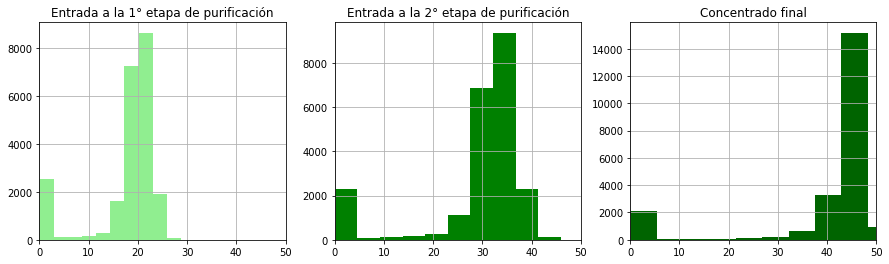

In [29]:
print('Cambio de concentración en oro (Au)')
plt.subplots(figsize=(15, 4))

#entrada a la 1° etapa del proceso de limpieza o purificación
gold_recovery_full['rougher.output.concentrate_au'].hist(ax=plt.subplot(1,3,1),color ='lightgreen')
plt.xlim(0, 50)
plt.title('Entrada a la 1° etapa de purificación')

#salida de la 1° etapa - entrada a la 2° etapa de limpieza o purificación.
gold_recovery_full['primary_cleaner.output.concentrate_au'].hist(ax=plt.subplot(1,3,2),color ='green')
plt.xlim(0, 50)
plt.title('Entrada a la 2° etapa de purificación')

#salida de la 2° etapa - concentrado final
gold_recovery_full['final.output.concentrate_au'].hist(ax=plt.subplot(1,3,3),color ='darkgreen')
plt.xlim(0, 50)
plt.title('Concentrado final')
plt.show()

Conforme se avanza en el proceso de purificación, la concenctración de oro va subiendo.

In [30]:
#cambio de concentración en plata (Ag)
gold_recovery_full.loc[:,['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag',
                        'final.output.concentrate_ag']].describe()

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,22716.000000,22716.000000,22716.000000
mean,10.845609,7.666972,4.768013
std,4.406924,3.134033,2.042594
min,0.000000,0.000000,0.000000
25%,10.112351,6.756639,4.011471
50%,11.774115,8.256062,4.949959
75%,13.609712,9.690952,5.857985
max,24.480271,16.081632,16.001945


Cambio de concentración en plata (Ag)


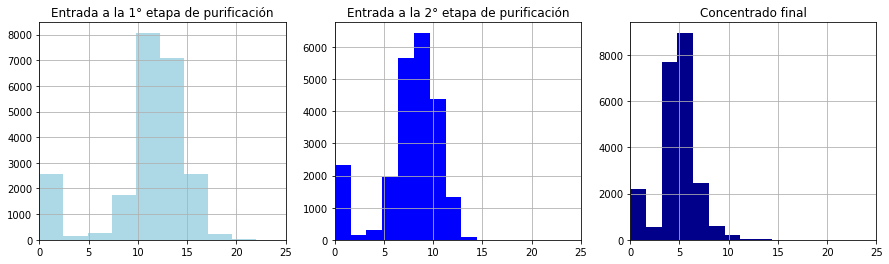

In [31]:
print('Cambio de concentración en plata (Ag)')
plt.subplots(figsize=(15, 4))

#entrada a la 1° etapa del proceso de limpieza o purificación
gold_recovery_full['rougher.output.concentrate_ag'].hist(ax=plt.subplot(1,3,1),color ='lightblue')
plt.xlim(0, 25)
plt.title('Entrada a la 1° etapa de purificación')

#salida de la 1° etapa - entrada a la 2° etapa de limpieza o purificación.
gold_recovery_full['primary_cleaner.output.concentrate_ag'].hist(ax=plt.subplot(1,3,2),color ='blue')
plt.xlim(0, 25)
plt.title('Entrada a la 2° etapa de purificación')

#salida de la 2° etapa - concentrado final
gold_recovery_full['final.output.concentrate_ag'].hist(ax=plt.subplot(1,3,3),color ='darkblue')
plt.xlim(0, 25)
plt.title('Concentrado final')
plt.show()

Conforme se avanza en el proceso de purificación, la concenctración de plata va bajando.

In [32]:
#cambio de concentración en plomo (Pb)
gold_recovery_full.loc[:,['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
                        'final.output.concentrate_pb']].describe()

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,22716.000000,22716.000000,22716.000000
mean,6.886869,8.809217,9.071366
std,2.831347,3.798169,3.260960
min,0.000000,0.000000,0.000000
25%,6.366740,7.649745,8.737809
50%,7.570890,9.882876,9.910363
75%,8.477617,11.234420,10.927188
max,18.394042,17.081278,17.031899


Cambio de concentración en plomo (Pb)


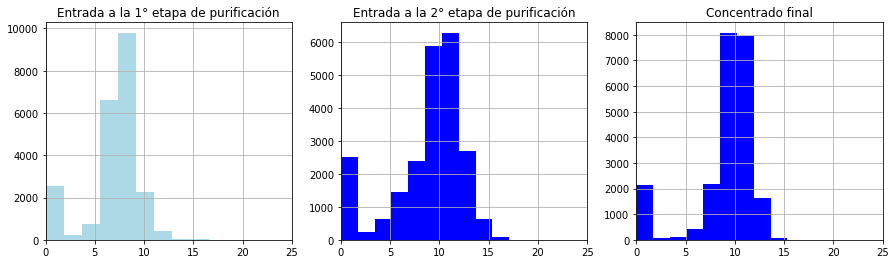

In [33]:
print('Cambio de concentración en plomo (Pb)')
plt.subplots(figsize=(15, 4))

#entrada a la 1° etapa del proceso de limpieza o purificación
gold_recovery_full['rougher.output.concentrate_pb'].hist(ax=plt.subplot(1,3,1),color ='lightblue')
plt.xlim(0, 25)
plt.title('Entrada a la 1° etapa de purificación')

#salida de la 1° etapa - entrada a la 2° etapa de limpieza o purificación.
gold_recovery_full['primary_cleaner.output.concentrate_pb'].hist(ax=plt.subplot(1,3,2),color ='blue')
plt.xlim(0, 25)
plt.title('Entrada a la 2° etapa de purificación')

#salida de la 2° etapa - concentrado final
gold_recovery_full['final.output.concentrate_pb'].hist(ax=plt.subplot(1,3,3),color ='blue')
plt.xlim(0, 25)
plt.title('Concentrado final')
plt.show()

Tras el primer proceso de purificación, la concentración de plomo disminuye; sin embargo tras el segundo proceso de limpieza, la concentración no tiene cambios significativos.

### Distribución del tamaño de las partículas de la alimentación

Se comparan las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba.



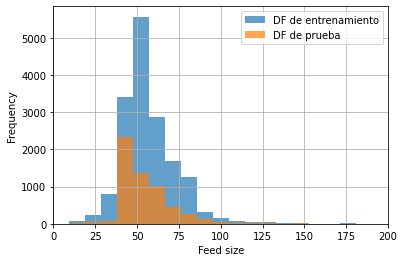

In [34]:
#tamaño de partículas de alimentación
gold_recovery_train['rougher.input.feed_size'].hist(alpha=.7, label='DF de entrenamiento',bins=50)
gold_recovery_test['rougher.input.feed_size'].hist(alpha=.7,label='DF de prueba',bins=50)
plt.legend()
plt.xlabel('Feed size')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.show()

In [35]:
#Medias y medianas
print('Media del df de entrenamiento:',round(gold_recovery_train['rougher.input.feed_size'].mean(),2))
print('Media del df de prueba:',round(gold_recovery_test['rougher.input.feed_size'].mean(),2))
print('\nMediana del df de entrenamiento:',round(gold_recovery_train['rougher.input.feed_size'].median(),2))
print('Mediana del df de prueba:',round(gold_recovery_test['rougher.input.feed_size'].median(),2))

Media del df de entrenamiento: 60.19
Media del df de prueba: 55.9

Mediana del df de entrenamiento: 54.07
Mediana del df de prueba: 49.96


Los datos tienen pequeñas diferencias pero las distribuciones son similares por lo cual los datos sirven para evaluar el modelo correctamente.

###  Concentraciones totales de todas las sustancias

Se analiza la distribución de los datos de las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final; esto en el conjunto de datos fuente.



In [36]:
#Materia prima
rougher_input = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']   

#Concentrado rougher
rougher_output = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol'
                  ,'rougher.output.concentrate_au']  

#Concentrado final
final_output = ['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol'
               ,'final.output.concentrate_au']

#Sumar datos por fila
rougher_input_sum = gold_recovery_full[rougher_input].sum(axis=1)
rougher_output_sum = gold_recovery_full[rougher_output].sum(axis=1)
final_output_sum = gold_recovery_full[final_output].sum(axis=1)

Concentraciones totales de todas las sustancias


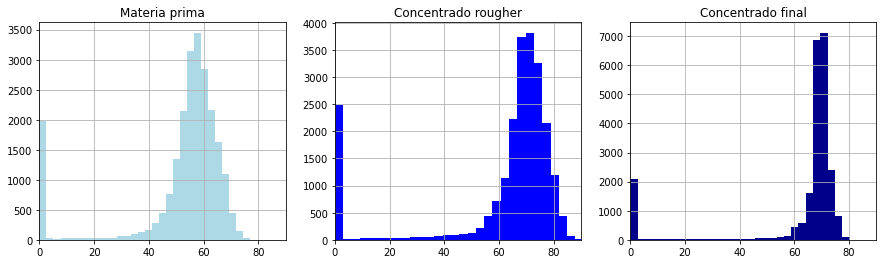

In [37]:
print('Concentraciones totales de todas las sustancias')
plt.subplots(figsize=(15, 4))

#Materia prima
rougher_input_sum.hist(ax=plt.subplot(1,3,1),color ='lightblue',bins=30)
plt.xlim(0, 90)
plt.title('Materia prima')

#Concentrado rougher
rougher_output_sum.hist(ax=plt.subplot(1,3,2),color ='blue',bins=30)
plt.xlim(0, 90)
plt.title('Concentrado rougher')

#Concentrado final
final_output_sum.hist(ax=plt.subplot(1,3,3),color ='darkblue',bins=30)
plt.xlim(0, 90)
plt.title('Concentrado final')
plt.show()

En las 3 etapas hay valores anormales; en todas las etapas hubo entrada de materia por lo cual no es normal tener valores en 0.

In [38]:
#Se conservan los valores mayores a 0.
rougher_input_sum2 = rougher_input_sum[rougher_input_sum>0]
rougher_output_sum2 = rougher_output_sum[rougher_output_sum>0]
final_output_sum2 = final_output_sum[final_output_sum>0]

Concentraciones totales de todas las sustancias


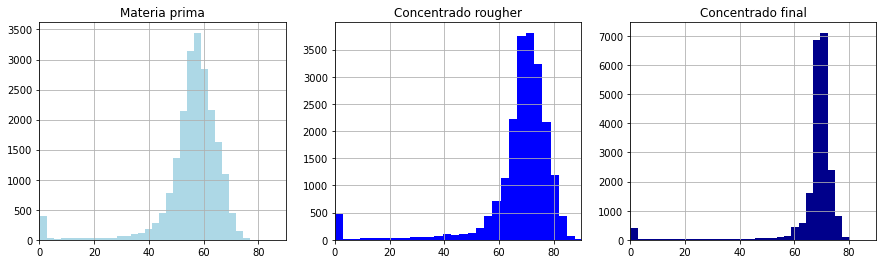

In [39]:
print('Concentraciones totales de todas las sustancias')
plt.subplots(figsize=(15, 4))

#Materia prima
rougher_input_sum2.hist(ax=plt.subplot(1,3,1),color ='lightblue',bins=30)
plt.xlim(0, 90)
plt.title('Materia prima')

#Concentrado rougher
rougher_output_sum2.hist(ax=plt.subplot(1,3,2),color ='blue',bins=30)
plt.xlim(0, 90)
plt.title('Concentrado rougher')

#Concentrado final
final_output_sum2.hist(ax=plt.subplot(1,3,3),color ='darkblue',bins=30)
plt.xlim(0, 90)
plt.title('Concentrado final')
plt.show()

##  Creación del modelo

### Preparar conjunto de datos de entrenamiento
Al igual que en la sección anterior, se eliminan los valores menores o iguales a 0 del conjunto de datos de entrenamiento.

In [40]:
#Conservar columnas donde la concentración total sea mayor a 0
gold_recovery_train = gold_recovery_train[gold_recovery_train[rougher_input].sum(axis=1)>0]
gold_recovery_train = gold_recovery_train[gold_recovery_train[rougher_output].sum(axis=1)>0]
gold_recovery_train = gold_recovery_train[gold_recovery_train[final_output].sum(axis=1)>0]
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15128 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                15128 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         15128 non-null  float64       
 2   final.output.concentrate_pb                         15128 non-null  float64       
 3   final.output.concentrate_sol                        15128 non-null  float64       
 4   final.output.concentrate_au                         15128 non-null  float64       
 5   final.output.recovery                               15128 non-null  float64       
 6   final.output.tail_ag                                15128 non-null  float64       
 7   final.output.tail_pb                                15128 non-null  float64       
 8   final.

### Preparar conjunto de datos de prueba
En este conjunto de datos faltan las columnas objetivo `rougher.output.recovery` y `final.output.recovery`. Estas se toman del conjunto de datos fuente tomando como referencia la fecha.

In [42]:
#completar df de prueba con df fuente
missing_columns = gold_recovery_full.loc[:,['date','rougher.output.recovery','final.output.recovery']]
gold_recovery_test_full = gold_recovery_test.merge(missing_columns,on='date')
gold_recovery_test_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

### Separar datos en características y objetivos

Al entrenar al modelo, solo se toman en cuenta las columnas/características disponibles en el conjunto de prueba.

In [43]:
#separar variables del conjunto de entrenamiento
gold_train_targets = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']]
gold_train_features = (gold_recovery_train.loc[:, list(gold_recovery_test.columns)]).drop('date',axis=1)


In [44]:
#separar variables del conjunto de prueba
gold_test_targets = gold_recovery_test_full[['rougher.output.recovery', 'final.output.recovery']]
gold_test_features = gold_recovery_test_full.drop(['date','rougher.output.recovery', 'final.output.recovery'],axis=1)

### Escalar datos

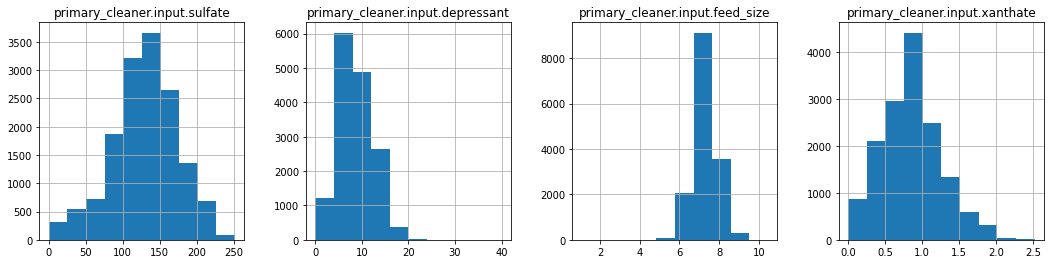

In [45]:
# Observar escalas de los datos del conjunto de entrenamiento
plt.subplots(figsize=(18, 4)) 

#columnas de entradas
columns = ['primary_cleaner.input.sulfate','primary_cleaner.input.depressant','primary_cleaner.input.feed_size',
           'primary_cleaner.input.xanthate']

#enumerate extrae el índice y el nombre de la columna, el índice le dice al subplot dónde poner el gráfico 
for i, column in enumerate(columns): 
    gold_train_features.hist(column=column, ax=plt.subplot(1, 4, i + 1))
plt.show() 

Al tomar una submuestra de las características del conjunto de entrenamiento, se observa que no tienen la misma escala, por lo que se tienen que escalar todos los datos para mejorar el entrenamiento de los modelos.

In [46]:
#escalar datos
scaler = StandardScaler()
scaler.fit(gold_train_features)

#escalar las características
gold_train_features = scaler.transform(gold_train_features) 
gold_test_features = scaler.transform(gold_test_features)

#verificar cambios
gold_train_features

array([[-0.06886698,  0.40534569, -0.0877424 , ..., -0.19889985,
        -0.82524347, -1.83065233],
       [-0.10176147,  0.45082121, -0.0877424 , ..., -0.2008881 ,
        -0.85033717, -1.71411401],
       [-0.14245143,  0.7270033 , -0.0877424 , ..., -0.19973303,
        -0.84536555, -1.74568299],
       ...,
       [-0.55068794, -0.18306335, -1.31109211, ..., -0.18894716,
         0.13257656,  0.17729139],
       [-0.70328068, -0.17519721, -1.31109211, ..., -0.19005362,
         0.13636561,  0.19447885],
       [-0.78495887, -0.14953108, -1.31109211, ..., -0.19192629,
         0.13248642,  0.22207744]])

### Función para calcular sMAPE

Se calcula la métrica sMAPE, o error medio absoluto porcentual simétrico, que se expresa en valores relativos y toma en cuenta la escala tanto del objetivo como de la predicción.



In [47]:
def sMAPE(target,prediction):
    #sMAPE rougher
    yr_target = target.iloc[:,0]
    yr_pred = prediction[:,0]
    sMAPE_rougher = mean(abs(yr_target-yr_pred) / ( (abs(yr_target)+abs(yr_pred))/ 2 ))*100
    
    #sMAPE final output
    yf_target = target.iloc[:,1]
    yf_pred = prediction[:,1]
    sMAPE_foutput = mean(abs(yf_target-yf_pred) / ( (abs(yf_target)+abs(yf_pred))/ 2 ))*100
    
    sMAPE_final = sMAPE_rougher*0.25 + sMAPE_foutput*0.75
    return sMAPE_final

In [48]:
#usar función sMAPE para calificar los modelos; es un error por lo que es mejor que sea más chico
sMAPE_score = make_scorer(sMAPE, greater_is_better = False)

### Entrenar modelos 
Se entrenan distintos modelos de machine learning aplicando validación cruzada al conjunto de datos de entrenamiento.

**Árbol de decisión**

In [49]:
best_depth=0
best_smape_dtr = 1000

#analizar profundidades de árbol hasta 9
for depth in range(1,10):
    model_dtr = DecisionTreeRegressor(max_depth=depth,random_state=12345)
    model_dtr_score = abs(mean(cross_val_score(model_dtr, gold_train_features, gold_train_targets, cv=5) ))
    print('Max depth =', depth,'-- sMAPE score:',model_dtr_score)
    
    if model_dtr_score < best_smape_dtr:
        best_smape_dtr = model_dtr_score
        best_depth = depth
        
print('\nBest max depth = ',best_depth,'-- sMAPE score:',best_smape_dtr)

Max depth = 1 -- sMAPE score: 0.1406237984888558
Max depth = 2 -- sMAPE score: 0.11959418007751779
Max depth = 3 -- sMAPE score: 0.21053684801850522
Max depth = 4 -- sMAPE score: 0.10055587094147642
Max depth = 5 -- sMAPE score: 0.4260260633324591
Max depth = 6 -- sMAPE score: 0.6267771786447551
Max depth = 7 -- sMAPE score: 0.7033938251571887
Max depth = 8 -- sMAPE score: 0.5389416257968989
Max depth = 9 -- sMAPE score: 0.4666004662627183

Best max depth =  4 -- sMAPE score: 0.10055587094147642


**Bosque aleatorio**

In [50]:
best_depth_rfr=0
best_smape_rfr = 1000

#analizar profundidades de árbol hasta 9
for depth in range(1,10):
    model_rfr = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state = 12345)
    model_rfr_score = abs(mean(cross_val_score(model_rfr, gold_train_features, gold_train_targets, scoring=sMAPE_score, cv=5)))
    print('Max depth =', depth,'-- sMAPE score:',model_rfr_score)
    
    if model_rfr_score < best_smape_rfr:
        best_smape_rfr = model_rfr_score
        best_depth_rfr = depth
        
print('\nBest max depth = ',best_depth_rfr,'-- sMAPE score:',best_smape_rfr)

Max depth = 1 -- sMAPE score: 10.88230393001004
Max depth = 2 -- sMAPE score: 10.300573937544588
Max depth = 3 -- sMAPE score: 10.518414325433087
Max depth = 4 -- sMAPE score: 10.23792906514171
Max depth = 5 -- sMAPE score: 10.02222262581122
Max depth = 6 -- sMAPE score: 10.868006705457413
Max depth = 7 -- sMAPE score: 11.356007961725506
Max depth = 8 -- sMAPE score: 11.412423395217571
Max depth = 9 -- sMAPE score: 11.59850587476902

Best max depth =  5 -- sMAPE score: 10.02222262581122


**Regresión lineal**

In [51]:
model_lr = LinearRegression()
model_lr_score = abs(cross_val_score(model_lr, gold_train_features, gold_train_targets, scoring=sMAPE_score, cv=5))
#promedio de las calificaciones
print('sMAPE score:',mean(model_lr_score))

sMAPE score: 12.11158833526754


### Modelo aplicado a conjunto de prueba

El menor sMAPE fue el del árbol de decision con profundidad máxima de 1 y sMAPE = -0.2350721591512516.

Se aplica este modelo al conjunto de prueba.

In [52]:
model_dtr = DecisionTreeRegressor(max_depth=1,random_state=12345)
model_dtr.fit(gold_train_features, gold_train_targets)

predictions = model_dtr.predict(gold_test_features)
print('sMAPE score:',sMAPE(gold_test_targets,predictions))

sMAPE score: 13.972965126409655


##  Conclusión

Se analizaron 3 archivos de datos:

- `gold_recovery_train`
- `gold_recovery_test`
- `gold_recovery_full`

No se encontraron valores duplicados pero si valores ausentes, los cuales representaban un porcentaje mínimo por lo cual se rellenaron con un valor representativo. Asimismo, se eliminaron las filas donde las concentraciones totales de todas las sustancias fueran iguales a 0 ya que las entradas con estos valores son valores atípicos.

Se calculó la recuperación del concentrado rougher para verificar que los datos de los archivos fueran válidos; al obtener el error medio entre el calculo y los datos de los archivos, se obtuvo uno cercano a cero; por lo cual el cálculo es correcto.

Al analizar la distribución del df de entrenamiento y del de prueba se determino que son similares por lo cual el conjunto de prueba es de utilidad para probar el modelo seleccionado.

Antes de crear los modelos, se escalaron los datos y se hizo el cálculo de la métrica sMAPE (error medio absoluto porcentual simétrico). Al entrenar los modelos, los mejores resultados fueron:

- Árbol de decisión:
    - Best max depth =  4
    - sMAPE score: 0.10055587094147642
- Bosque aleatorio
    - Best max depth =  5
    - sMAPE score: 10.02222262581122
- Regresión lineal
    - sMAPE score: 13.972965126409655
    

Comparando los mejores resultados, se determinó que el mejor es el **Árbol de decisión con profundidad máxima de 4 y sMAPE = 0.10**.

Al aplicar el modelo final al conjunto de prueba se obtuvo un sMAPE =  13.97

</div>

